# K-Nearest Neighbors

## KNN for Classification

Load data.

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [14]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Split data.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=42)

In [10]:
X_train.shape, y_train.shape

((426, 30), (426,))

In [11]:
X_test.shape, y_test.shape

((143, 30), (143,))

Train model.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [35]:
knn.predict_proba(X_test).shape

(143, 2)

Score model.

In [13]:
knn.score(X_test, y_test)

0.965034965034965

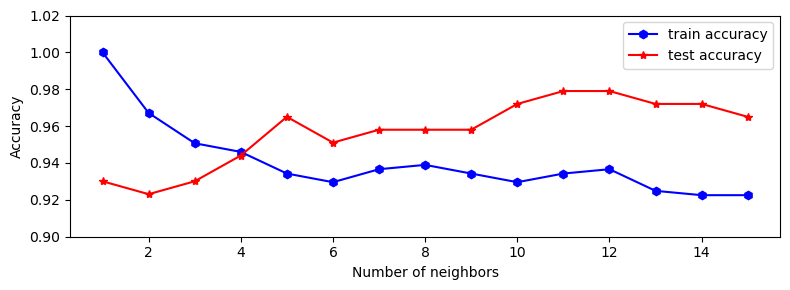

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=42)

train_scores, test_scores = [], []

neighbor_candidates = range(1, 16)
for n_neighbors in neighbor_candidates:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(neighbor_candidates, train_scores, 'b-h', label='train accuracy')
ax.plot(neighbor_candidates, test_scores, 'r-*', label='test accuracy')
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Accuracy')
ax.set_ylim([0.9, 1.02])
ax.legend()
fig.tight_layout()

## KNN for Regression

In [36]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [43]:
knn.score(X_test, y_test)

0.37222167132521977

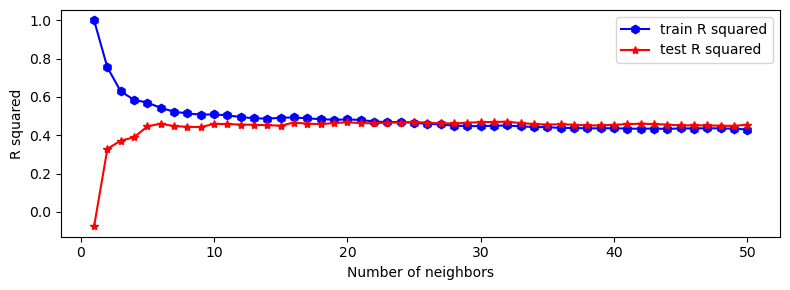

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=42)

train_scores, test_scores = [], []
neighbor_candidates = range(1, 51)
for n_neighbors in neighbor_candidates:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(neighbor_candidates, train_scores, 'b-h', label='train R squared')
ax.plot(neighbor_candidates, test_scores, 'r-*', label='test R squared')
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('R squared')
ax.legend()
fig.tight_layout()
